# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Em uma instituição financeira, é essencial se atentar ao perfil dos novos clientes: do que trabalham, o salário, o fato de serem adimplentes ou inadimplentes, dentre outras questões. Essa análise, além de ser importante para entender quem é o usuário do banco, também serve para dimensionar o limite dos cartões de crédito destes a fim de evitar problemas futuros. Nessa análise, não necessariamente é preciso solicitar olerites ou documentações para a análise, que podem por si só impactar a experiência do cliente.

Sobre esse viés, conduzi um estudo com alguns clientes de um banco, comprovando sua renda através de olerites e outros documentos passados, pretendendo construir um *"modelo preditivo"* para esta renda com base em algumas variáveis já salvas no banco de dados. Segue a análise: 


## Etapa 2 Crisp-DM: Entendimento dos dados


### Dicionário de dados

Segue alguns dados dos clientes salvos no banco de dados do banco: 


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência na coleta de variáveis                                     | object|
| id_cliente              |  Código identificador do cliente                                      | int|
| sexo                    |  Sexo do cliente (M sendo masculino e F feminino)                                    | object (binária)|
| posse_de_veiculo        |  Indica se cliente possui veículo (True quando possui e False quando não possui                                                                                                                             |bool (binária)|
| posse_de_imovel         |  Indica se cliente possui imóvel (True quando possui e False quando não possui)                                    | bool (binária)|
| qtd_filhos              |  Indica a quantidade de filhos do cliente                                     | int|
| tipo_renda              |  Tipo de renda do cliente (Empresário, Assalariado, Servidor público, Pensionista, Bolsista)                                   | object|
| educacao                |  Grau de instrução do cliente (Primário, Secundário, Superior incompleto, Superior completo, Pós graduação)                                      | object|
| estado_civil            |  Estado civil do cliente (Solteiro, União, Casado, Separado, Viúvo)                                     | object|
| tipo_residencia         |  Tipo de residência do cliente (Casa, Governamental, Com os pais, Aluguel, Estúdio, Comunitário)                                      | object|
| idade                   |  Idade do cliente em anos                                      | int|
| tempo_emprego           |  Tempo do emprego atual                                     | float|
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência                                      | float|
| renda                   |  Valor numérico decimal representando a renda do cliente em reais                                    | float|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
#pip install ydata-profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
%matplotlib inline

#### Carregando os dados

O comando **pd.read_csv** é um comando da biblioteca pandas (pd.) que carrega os dados do arquivo csv, indicado para um objeto **DataFrame** do pandas.



In [2]:
filepath = './input/previsao_de_renda.csv'
renda = pd.read_csv(filepath_or_buffer=filepath)

renda.info()
renda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  \
0               0  2015-01-01       15056    F             False   
1               1  2015-01-01        9968    M              True   
2               2  2015-01-01        4312    F              True   
3               3  2015-01-01       10639    F             False   
4               4  2015-01-01        7064    M              True   
...           ...         ...         ...  ...               ...   
14995       14995  2016-03-01       16006    F             False   
14996       14996  2016-03-01        3722    F             False   
14997       14997  2016-03-01        6194    F              True   
14998       14998  2016-03-01        4922    M              True   
14999       14999  2016-03-01       14651    F             False   

       posse_de_imovel  qtd_filhos        tipo_renda           educacao  \
0                 True           0        Empresário         Secundário   
1                 True           0       Assalariado  Superior completo   
2                 True           0        Empresário  Superior completo   
3                 True           1  Servidor público  Superior completo   
4                False           0       Assalariado         Secundário   
...                ...         ...               ...                ...   
14995             True           0        Empresário         Secundário   
14996             True           0       Pensionista  Superior completo   
14997             True           0       Assalariado  Superior completo   
14998            False           0        Empresário  Superior completo   
14999             True           2  Servidor público         Secundário   

      estado_civil tipo_residencia  idade  tempo_emprego  \
0         Solteiro            Casa     26       6.602740   
1           Casado            Casa     28       7.183562   
2           Casado            Casa     35       0.838356   
3           Casado            Casa     30       4.846575   
4         Solteiro   Governamental     33       4.293151   
...            ...             ...    ...            ...   
14995     Solteiro            Casa     48      13.887671   
14996     Solteiro            Casa     57            NaN   
14997       Casado            Casa     45       7.832877   
14998       Casado            Casa     36       4.298630   
14999        União            Casa     34       7.219178   

       qt_pessoas_residencia     renda  
0                        1.0   8060.34  
1                        2.0   1852.15  
2                        2.0   2253.89  
3                        3.0   6600.77  
4                        1.0   6475.97  
...                      ...       ...  
14995                    1.0   7990.58  
14996                    1.0  10093.45  
14997                    2.0    604.82  
14998                    2.0   3352.27  
14999                    4.0   1160.99  

[15000 rows x 15 columns]

In [3]:
# Parâmetro para avaliar os valores únicos do arquivo/variável renda
renda.nunique()

Unnamed: 0               15000
data_ref                    15
id_cliente                9845
sexo                         2
posse_de_veiculo             2
posse_de_imovel              2
qtd_filhos                   8
tipo_renda                   5
educacao                     5
estado_civil                 5
tipo_residencia              6
idade                       47
tempo_emprego             2589
qt_pessoas_residencia        9
renda                     9786
dtype: int64

In [4]:
# Dropando/retirando linhas e colunas desnecessárias para a análise de dados 
renda.drop(columns=['Unnamed: 0', 'id_cliente'], inplace=True)

print('Quantidade total de linhas:', len(renda), '\n')
print('Quantidade de linhas duplicadas:', renda.duplicated().sum(), '\n')
print('Quantidade após remoção das linhas duplicadas:', 
      len(renda.drop_duplicates()), '\n')

renda.drop_duplicates(inplace=True, ignore_index=True)
renda.info()

Quantidade total de linhas: 15000 

Quantidade de linhas duplicadas: 407 

Quantidade após remoção das linhas duplicadas: 14593 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               14593 non-null  object 
 1   sexo                   14593 non-null  object 
 2   posse_de_veiculo       14593 non-null  bool   
 3   posse_de_imovel        14593 non-null  bool   
 4   qtd_filhos             14593 non-null  int64  
 5   tipo_renda             14593 non-null  object 
 6   educacao               14593 non-null  object 
 7   estado_civil           14593 non-null  object 
 8   tipo_residencia        14593 non-null  object 
 9   idade                  14593 non-null  int64  
 10  tempo_emprego          12090 non-null  float64
 11  qt_pessoas_residencia  14593 non-null  float64
 12  renda                  14593

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

#### Pandas Profiling - Relatório interativo de análise exploratória de dados 

In [6]:
prof = ProfileReport(df=renda, 
                     minimal=False, 
                     explorative=True, 
                     dark_mode=True, 
                     orange_mode=True)
os.makedirs(name='./output', exist_ok=True)
prof.to_file('./output/renda_analysis.html')

prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\DESKTOP\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Secundário'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Estatísticas descritivas das variáveis quantitativas 

In [5]:
# Gerando "estatísticas descritivas de resumo" do DataFrame "renda" de todas as colunas numéricas
renda.describe().transpose()

count         mean          std         min  \
qtd_filhos             14593.0     0.433290     0.746029    0.000000   
idade                  14593.0    43.868910    11.276626   22.000000   
tempo_emprego          12090.0     7.724567     6.718007    0.117808   
qt_pessoas_residencia  14593.0     2.207086     0.909117    1.000000   
renda                  14593.0  5698.140557  8314.021152  118.710000   

                               25%          50%          75%            max  
qtd_filhos                0.000000     0.000000     1.000000      14.000000  
idade                    34.000000    43.000000    53.000000      68.000000  
tempo_emprego             3.006164     6.013699    10.123288      42.906849  
qt_pessoas_residencia     2.000000     2.000000     3.000000      15.000000  
renda                  2018.880000  3488.410000  6379.570000  245141.670000

#### Matriz de correlação

In [6]:
# Ler o arquivo CSV
renda = pd.read_csv('./input/previsao_de_renda.csv')

# Selecionar apenas as colunas numéricas
colunas_numericas = renda.select_dtypes(include=['float64', 'int64'])

# Calcular a correlação entre as colunas numéricas
correlacao = colunas_numericas.corr()

# Exibir a última linha da matriz de correlação
ultima_linha_correlacao = correlacao.tail(1)
print(ultima_linha_correlacao)


       Unnamed: 0  id_cliente  qtd_filhos     idade  tempo_emprego  \
renda    0.004901   -0.009129    0.029346  0.022435       0.385013   

       qt_pessoas_residencia  renda  
renda               0.047842    1.0  


A partir da **matriz de correlação** foi possível perceber que a variável que possui mais relação com a variável **renda** é **tempo_emprego**, com índice de correlação de **38,5%**. Isso pode servir como um insight significativo para prever o perfil dos clientes. 

### Matriz de dispersão

C:\Users\DESKTOP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DESKTOP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DESKTOP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DESKTOP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

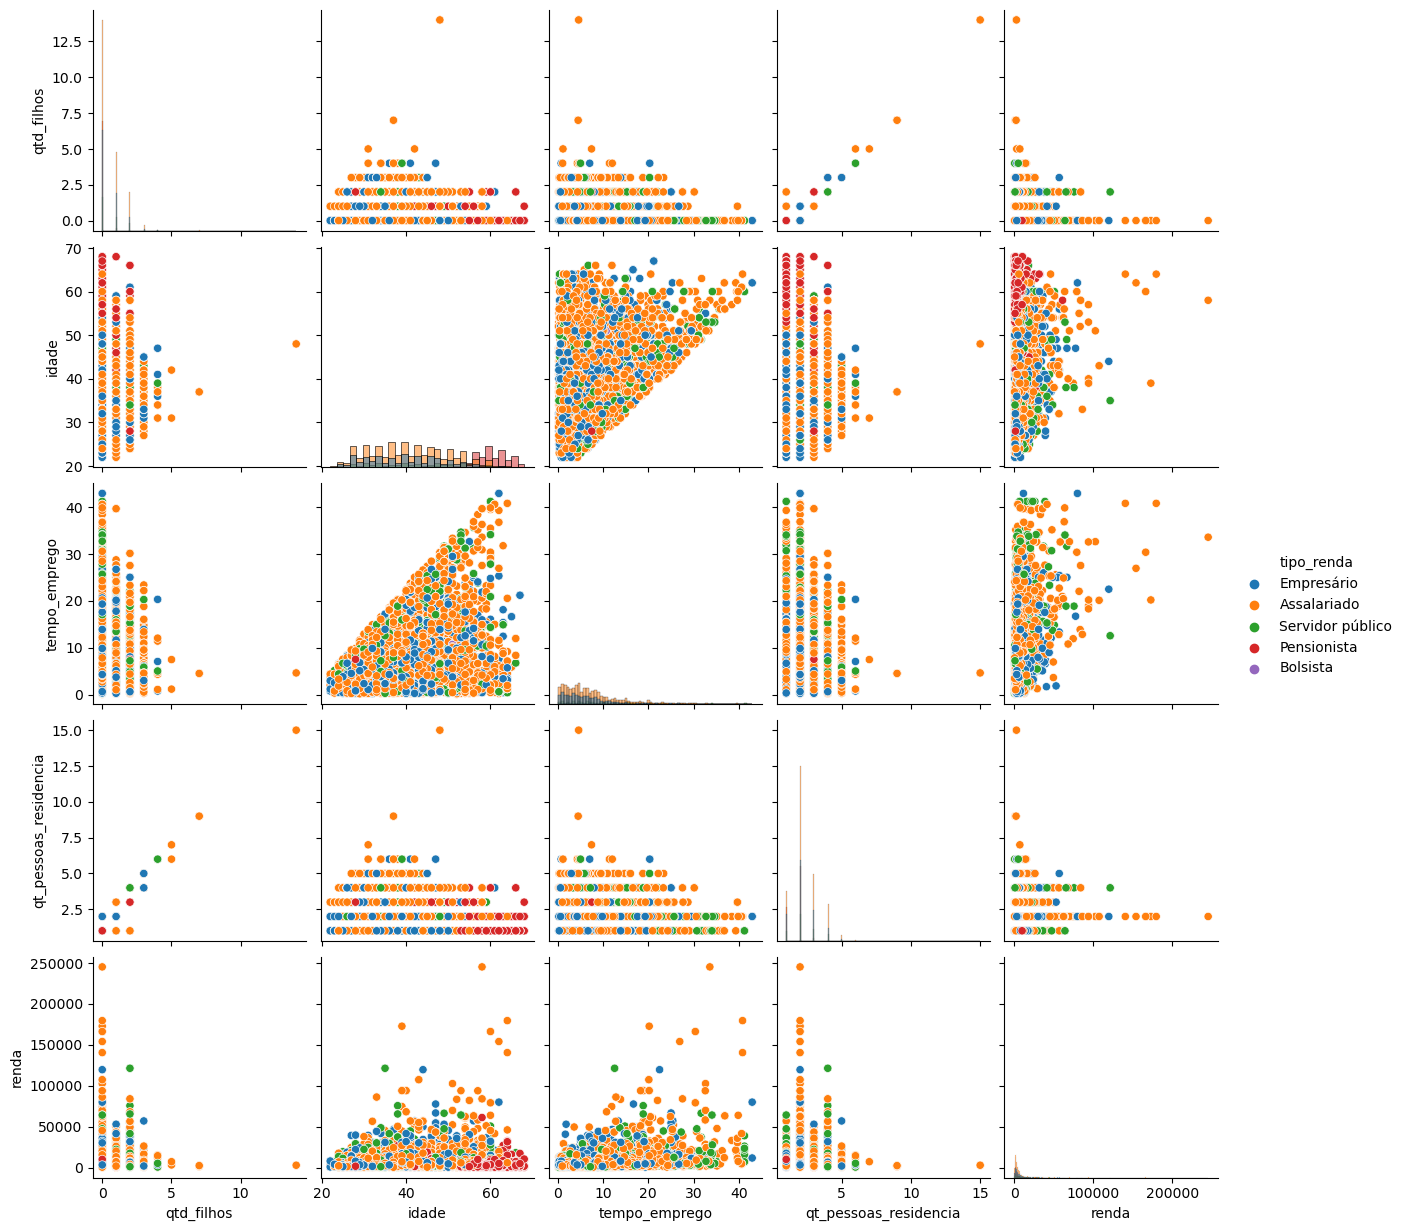

In [7]:
sns.pairplot(data=renda, 
             hue='tipo_renda', 
             vars=['qtd_filhos', 
                   'idade', 
                   'tempo_emprego', 
                   'qt_pessoas_residencia', 
                   'renda'], 
             diag_kind='hist')

plt.show()

Ao analisar o *pairplot*, uma matriz de dispersão, é posível identificar alguns outliers na variável renda, os quais podem prejudicar critérios de análise - como de tendência por exemplo -, apesar de ocorrerem em baixa frequência. É observada também uma baixa correlação entre as variáveis quantitativas, reforçando os resultados da matriz de correlação. 

#### Clustermap

Colunas não numéricas: Index(['data_ref', 'educacao', 'estado_civil', 'posse_de_imovel',
       'posse_de_veiculo', 'sexo', 'tipo_renda', 'tipo_residencia'],
      dtype='object')


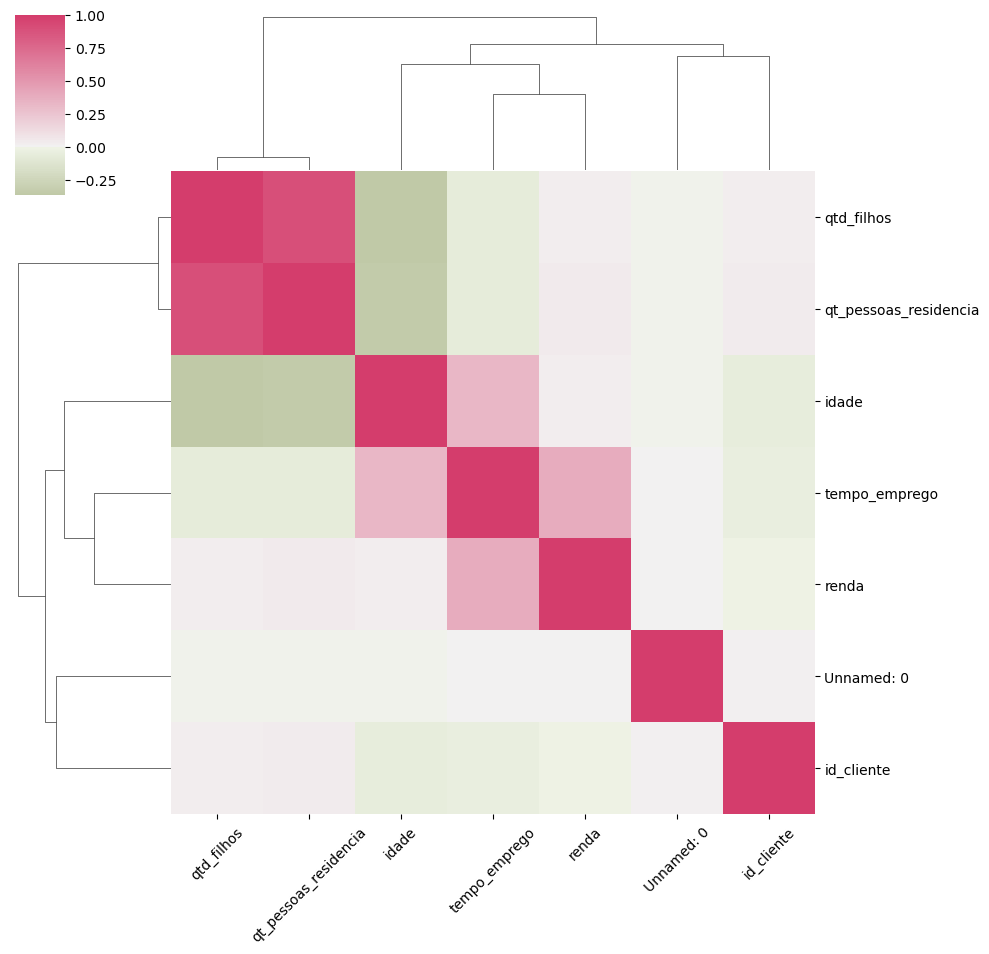

In [33]:
renda_numeric = renda.select_dtypes(include=['float', 'int'])

# Definindo a paleta de cores
cmap = sns.diverging_palette(h_neg=100, 
                             h_pos=359, 
                             as_cmap=True, 
                             sep=1, 
                             center='light')

# Gerando o clustermap com os dados numéricos
ax = sns.clustermap(data=renda_numeric.corr(), 
                    figsize=(10, 10), 
                    center=0, 
                    cmap=cmap)

# Rotacionando os rótulos do eixo x
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=45)

# Exibindo as colunas não numéricas
colunas_nao_numericas = renda.columns.difference(renda_numeric.columns)
print("Colunas não numéricas:", colunas_nao_numericas)

# Exibindo o clustermap
plt.show()

Com o **cluestermap** é possível observar resultados de baixa correlação com a variável **renda**. Apenas a variável **tempo_emprego** apresenta um número considerável. 

#### Linha de tendência 

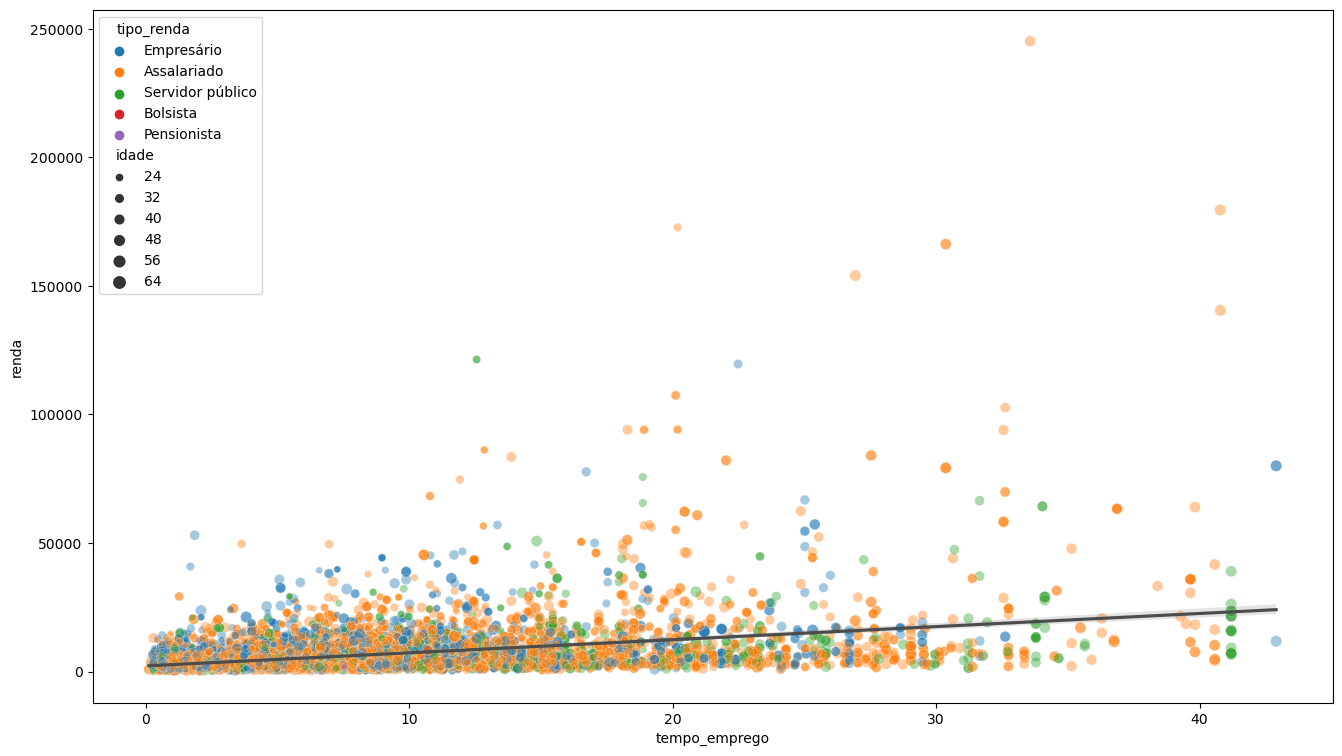

In [17]:
# Usando as variáveis mais relevantes 
plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',
                y='renda', 
                hue='tipo_renda', 
                size='idade',
                data=renda,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=renda, 
            scatter=False, 
            color='.3')

plt.show()

Mesmo a **renda** e o **tempo_emprego** não tendo um grau de correlação muito alto, é possível identificar com esse gráfico um grau de covariância positiva com a inclinação da reta

#### Análise das variáveis qualitativas

Análise de relevância preditiva com variáveis booleanas

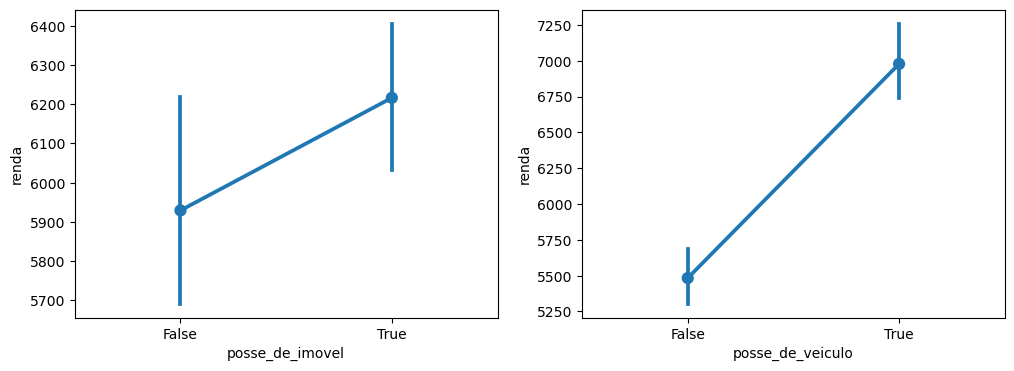

In [18]:
plt.rc('figure', figsize=(12,4))
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.pointplot(x='posse_de_imovel', 
              y='renda',  
              data=renda, 
              dodge=True, 
              ax=axes[0])

sns.pointplot(x='posse_de_veiculo', 
              y='renda', 
              data=renda, 
              dodge=True, 
              ax=axes[1])

plt.show()

Fazendo a comparação dos gráficos acima, se conclui que a variável **posse_de_veiculo** apresenta maior relevância na predição de renda por mostrar maior distãncia entre intervalos de confiança para clientes que possuem ou não um veículo. Já a variável **posse_de_imovel** não apresenta uma diferença significativa entre as possíveis condições de posse imobiliária. 


#### Análise das variáveis qualitativas ao longo do tempo 

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_2932\3863990548.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


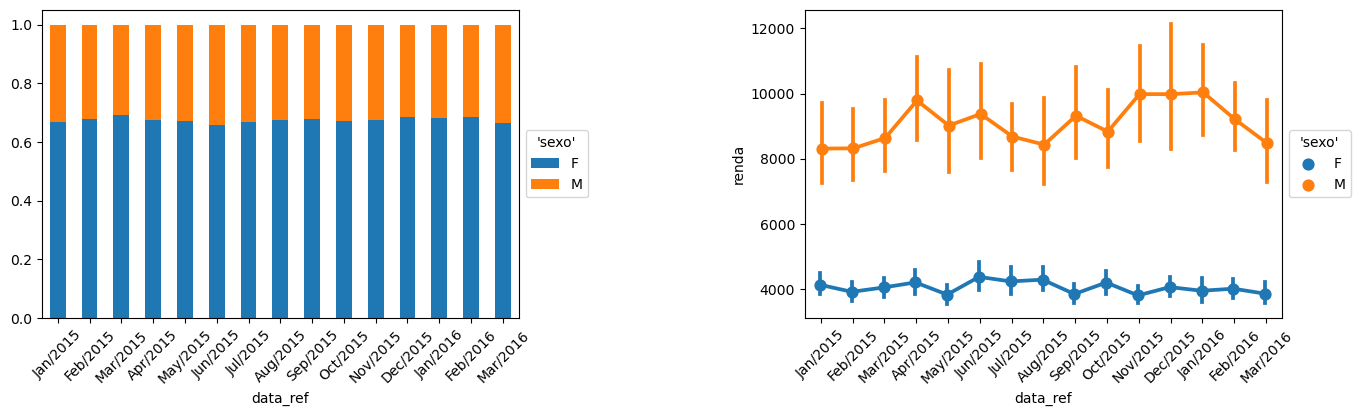

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_2932\3863990548.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


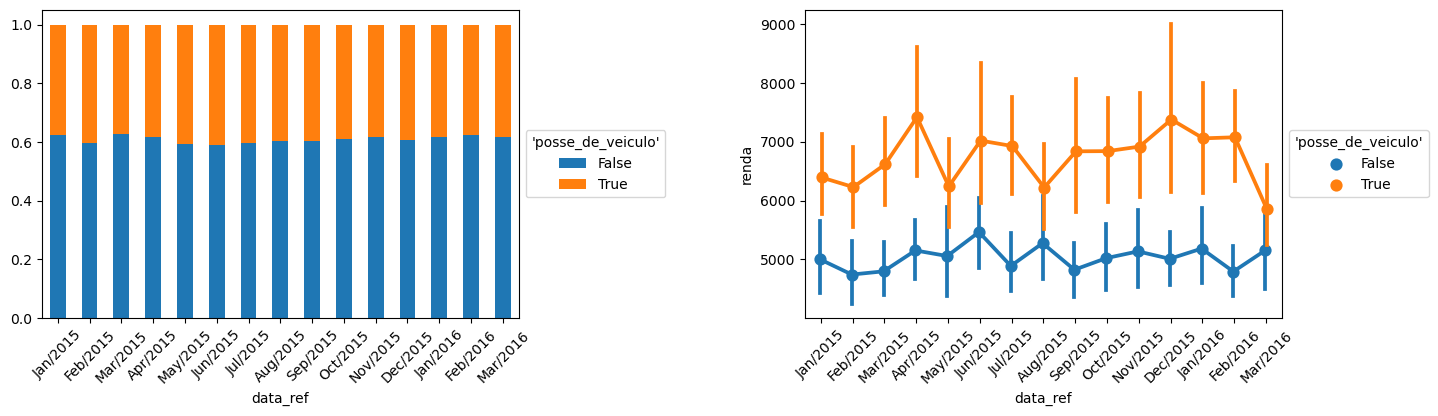

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_2932\3863990548.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


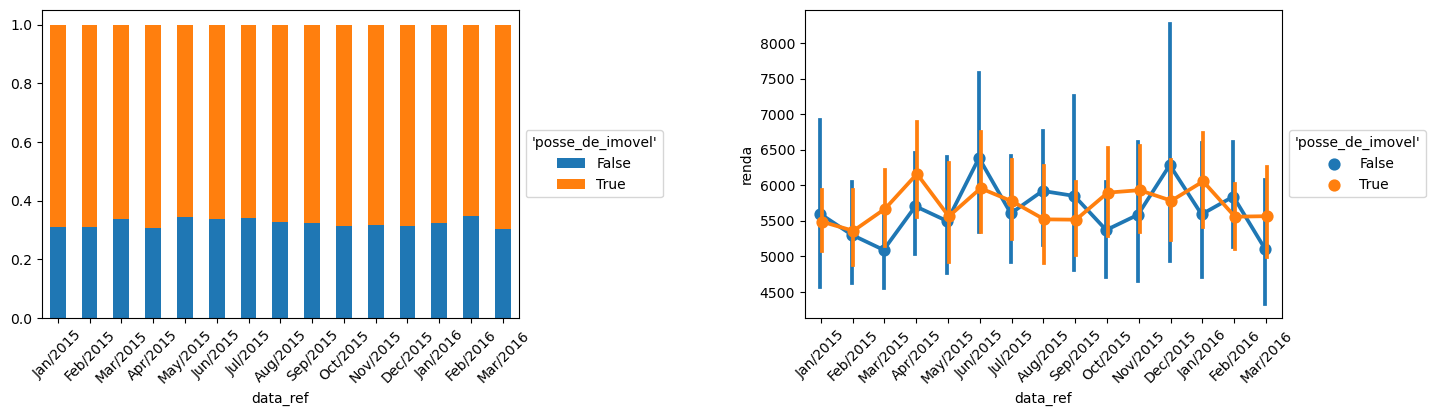

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_2932\3863990548.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


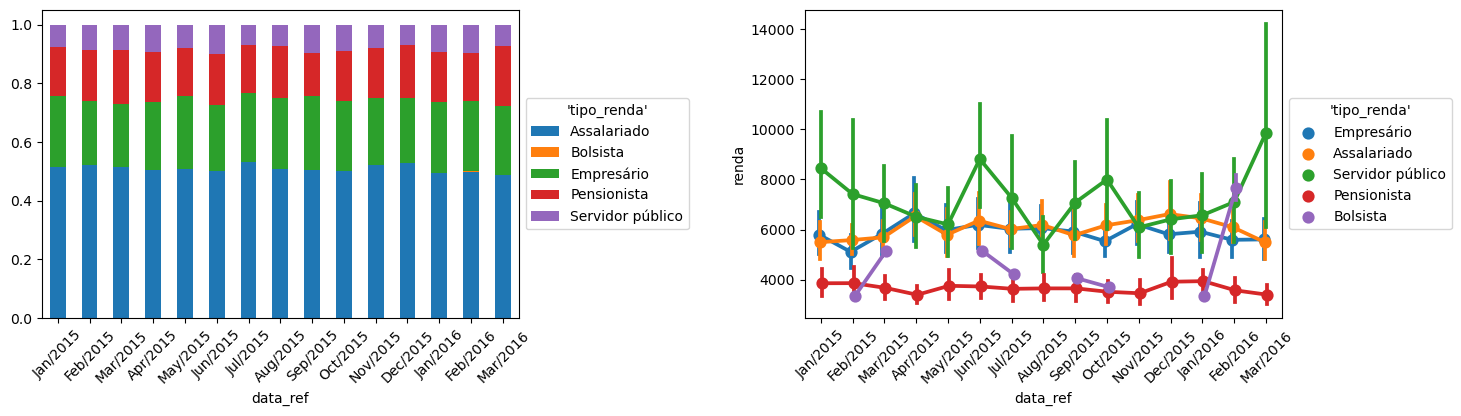

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_2932\3863990548.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


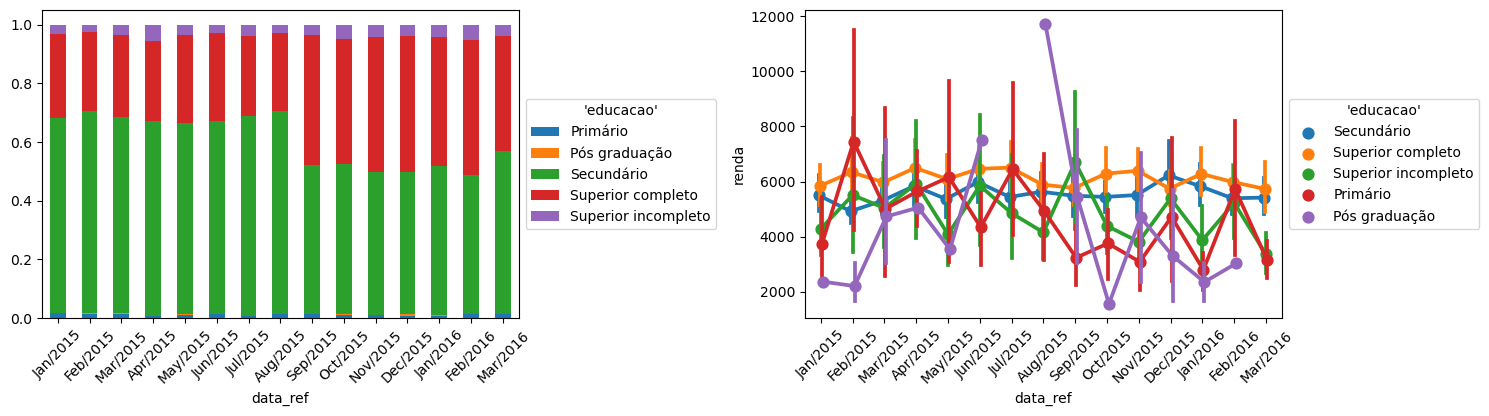

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_2932\3863990548.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


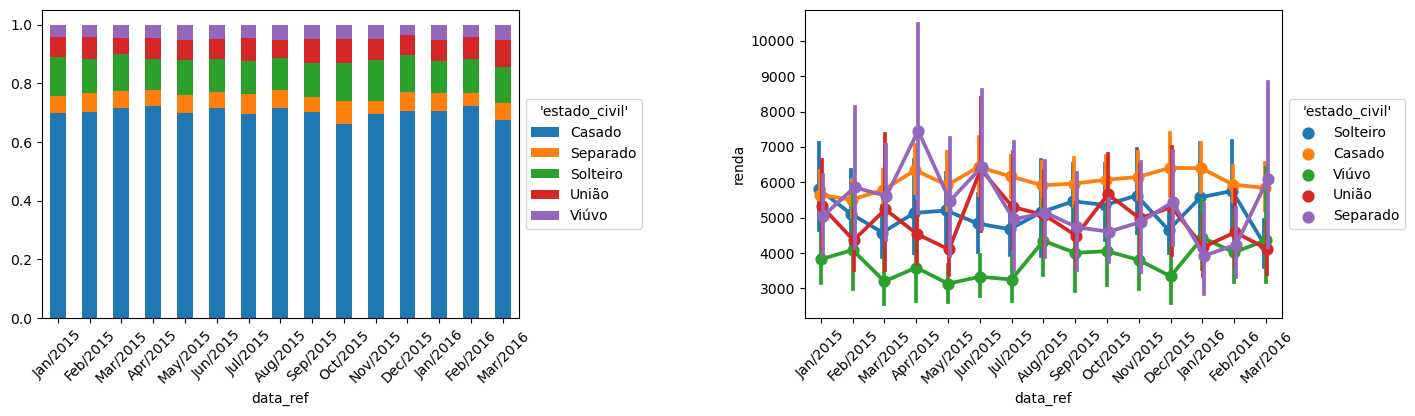

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_2932\3863990548.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


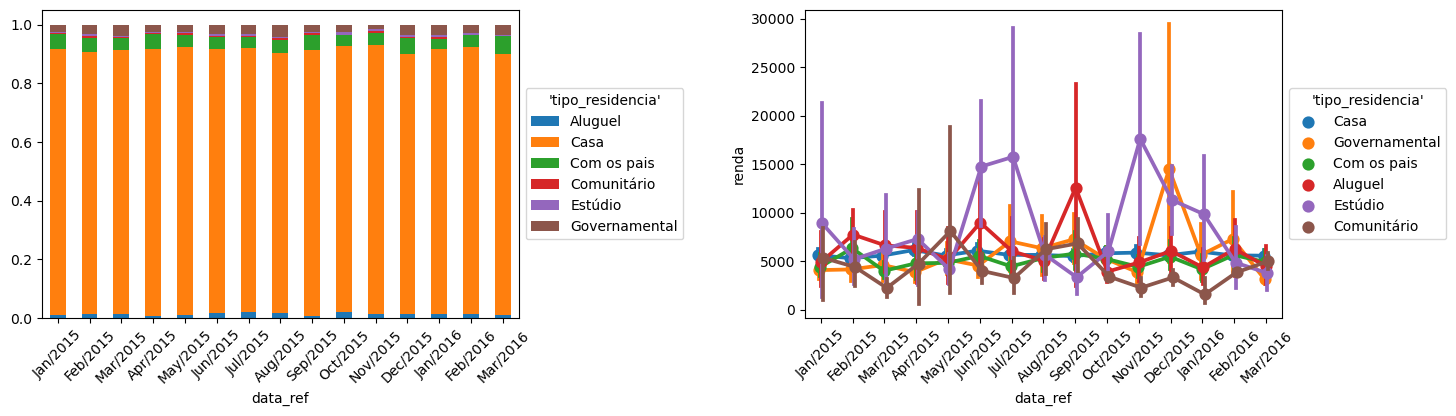

In [34]:
renda['data_ref'] = pd.to_datetime(arg=renda['data_ref'])

qualitativas = renda.select_dtypes(include=['object', 'boolean']).columns

plt.rc('figure', figsize=(16,4))

for col in qualitativas:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.subplots_adjust(wspace=.6)
    
    tick_labels = renda['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()
    
    # barras empilhadas:
    renda_crosstab = pd.crosstab(index=renda['data_ref'], 
                                 columns=renda[col], 
                                 normalize='index')
    ax0 = renda_crosstab.plot.bar(stacked=True, 
                                  ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    # perfis médios no tempo: 
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    plt.show()


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [8]:
renda.drop(columns='data_ref', inplace=True)
renda.dropna(inplace=True)

pd.DataFrame(index=renda.nunique().index, 
             data={'tipos_dados': renda.dtypes, 
                   'qtd_valores': renda.notna().sum(), 
                   'qtd_categorias': renda.nunique().values})

tipos_dados  qtd_valores  qtd_categorias
Unnamed: 0                  int64        12427           12427
id_cliente                  int64        12427            8161
sexo                       object        12427               2
posse_de_veiculo             bool        12427               2
posse_de_imovel              bool        12427               2
qtd_filhos                  int64        12427               8
tipo_renda                 object        12427               5
educacao                   object        12427               5
estado_civil               object        12427               5
tipo_residencia            object        12427               6
idade                       int64        12427              46
tempo_emprego             float64        12427            2589
qt_pessoas_residencia     float64        12427               9
renda                     float64        12427            8126

#### Conversão das variáveis categóricas em variáveis numéricas (dummies)


In [11]:
renda_dummies = pd.get_dummies(data=renda)
renda_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     12427 non-null  int64  
 1   id_cliente                     12427 non-null  int64  
 2   posse_de_veiculo               12427 non-null  bool   
 3   posse_de_imovel                12427 non-null  bool   
 4   qtd_filhos                     12427 non-null  int64  
 5   idade                          12427 non-null  int64  
 6   tempo_emprego                  12427 non-null  float64
 7   qt_pessoas_residencia          12427 non-null  float64
 8   renda                          12427 non-null  float64
 9   sexo_F                         12427 non-null  bool   
 10  sexo_M                         12427 non-null  bool   
 11  tipo_renda_Assalariado         12427 non-null  bool   
 12  tipo_renda_Bolsista            12427 non-null  bool

In [12]:
(renda_dummies.corr()['renda']
              .sort_values(ascending=False)
              .to_frame()
              .reset_index()
              .rename(columns={'index':'var', 
                               'renda':'corr'})
              .style.bar(color=['darkred', 'darkgreen'], align=0)
)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Para a modelagem de dados, a técnica utilizada será a **Decision Tree Regressor**. Sua capacidade de lidar com problemas de regressão é o fator principal, como a previsão de renda dos clientes. Além de serem mais fáceis de intepretar, ela possibilita a identificação de atributos mais relevantes para a previsão da variável-alvo, tornando essencial para o manuseamento de dados deste projeto. 

### Dividindo as bases em treino e teste

In [13]:
X = renda_dummies.drop(columns='renda')
y = renda_dummies['renda']

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Quantidade de linhas e colunas de X: (12427, 31)
Quantidade de linhas de y: 12427
X_train: (9320, 31)
X_test: (3107, 31)
y_train: (9320,)
y_test: (3107,)


### Hiperparâmetros com "FOR LOOP"

**'max_depth'**: Profundidade Máxima

**'min_samples_leaf'** Número mínimo de amostras por folha 

**'score'** Pontuacao

In [14]:
score = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'score'])

for x in range(1, 21):
    for y in range(1, 31):
        reg_tree = DecisionTreeRegressor(random_state=42, 
                                         max_depth=x, 
                                         min_samples_leaf=y)
        reg_tree.fit(X_train, y_train)
        
        score = pd.concat(objs=[score, 
                                pd.DataFrame({'max_depth': [x], 
                                              'min_samples_leaf': [y], 
                                              'score': [reg_tree.score(X=X_test, 
                                                                       y=y_test)]})], 
                          axis=0, 
                          ignore_index=True)
        
score.sort_values(by='score', ascending=False)

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_10428\2645755207.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score = pd.concat(objs=[score,


max_depth min_samples_leaf     score
137         5               18  0.404094
139         5               20  0.402842
138         5               19  0.402842
103         4               14  0.397264
107         4               18  0.397264
..        ...              ...       ...
20          1               21  0.101771
19          1               20  0.101771
18          1               19  0.101771
540        19                1  0.043311
420        15                1  0.019561

[600 rows x 3 columns]

### Rodando o modelo


In [15]:
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)

#### Visualização gráfica da árvore com plot_tree

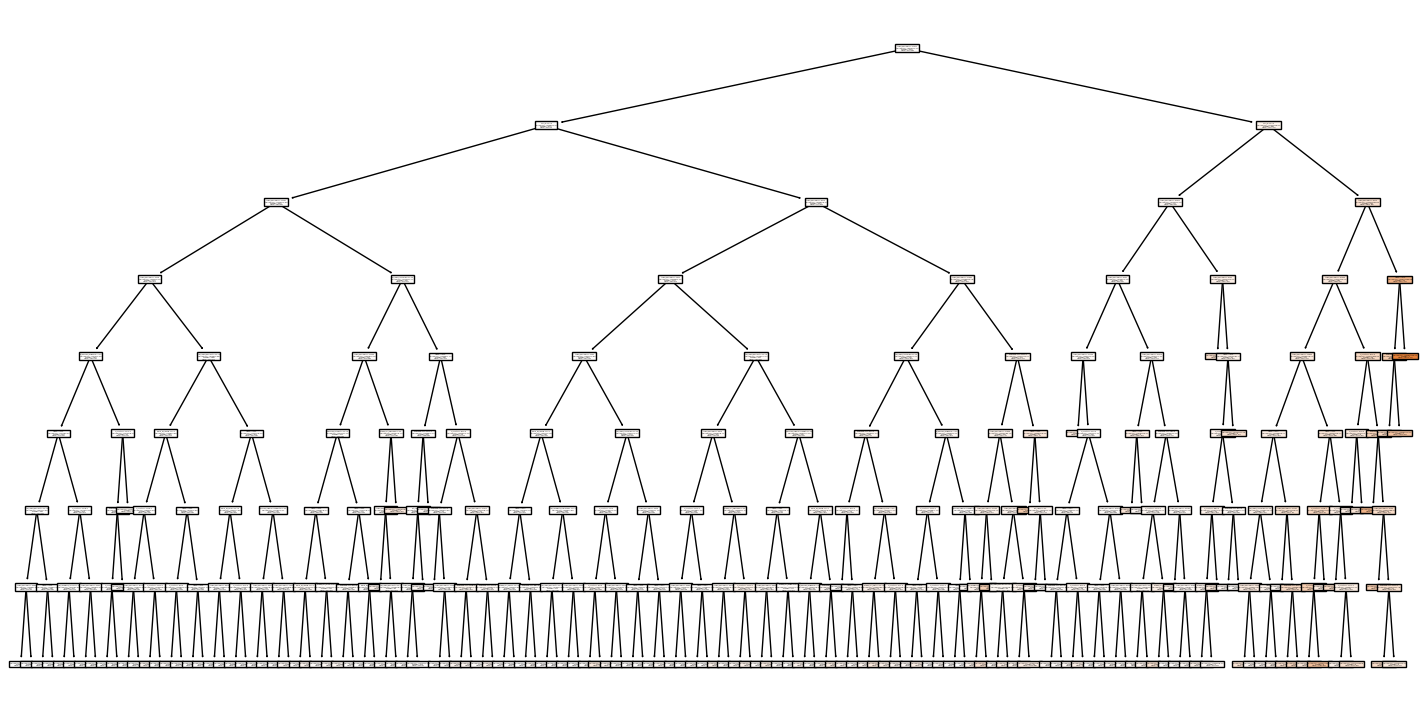

In [16]:
plt.rc('figure', figsize=(18,9))

tp = tree.plot_tree(decision_tree=reg_tree, 
                    feature_names=X.columns, 
                    filled=True)

#### Visualização impressa

In [17]:
text_tree_print = tree.export_text(decision_tree=reg_tree)

print(text_tree_print)

|--- feature_6 <= 17.01
|   |--- feature_9 <= 0.50
|   |   |--- feature_6 <= 10.27
|   |   |   |--- feature_6 <= 3.45
|   |   |   |   |--- feature_7 <= 4.50
|   |   |   |   |   |--- feature_5 <= 44.50
|   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |--- feature_6 <= 0.68
|   |   |   |   |   |   |   |   |--- value: [1980.30]
|   |   |   |   |   |   |   |--- feature_6 >  0.68
|   |   |   |   |   |   |   |   |--- value: [2519.28]
|   |   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   |   |--- feature_5 <= 42.50
|   |   |   |   |   |   |   |   |--- value: [3127.13]
|   |   |   |   |   |   |   |--- feature_5 >  42.50
|   |   |   |   |   |   |   |   |--- value: [2215.98]
|   |   |   |   |   |--- feature_5 >  44.50
|   |   |   |   |   |   |--- feature_1 <= 16235.50
|   |   |   |   |   |   |   |--- feature_25 <= 0.50
|   |   |   |   |   |   |   |   |--- value: [2929.68]
|   |   |   |   |   |   |   |--- feature_25 >  0.50
|   |   |   |   |   |   |   

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [18]:
r2_train = reg_tree.score(X=X_train, y=y_train)
r2_test = reg_tree.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação (𝑅2) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(reg_tree.get_depth(), 'treino', r2_train).replace(".", ","))
print(template.format(reg_tree.get_depth(), 'teste', r2_test).replace(".", ","), '\n')

O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de treino é: 0,64
O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de teste é: 0,35 



In [19]:
renda['renda_predict'] = np.round(reg_tree.predict(X), 2)
renda[['renda', 'renda_predict']]

renda  renda_predict
0      8060.34        2281.78
1      1852.15        7949.24
2      2253.89        3127.13
3      6600.77        3296.07
4      6475.97        5425.56
...        ...            ...
14994  1592.57       12206.59
14995  7990.58        5259.04
14997   604.82        3296.07
14998  3352.27        5735.97
14999  1160.99        3296.07

[12427 rows x 2 columns]

Com a técnica usada com as árvores, conseguimos prever a renda, segundo a tabela acima. 

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

#### Simulando a previsão de renda

In [21]:
entrada = pd.DataFrame([{'sexo': 'M', 
                         'posse_de_veiculo': False, 
                         'posse_de_imovel': True, 
                         'qtd_filhos': 1, 
                         'tipo_renda': 'Assalariado', 
                         'educacao': 'Superior completo', 
                         'estado_civil': 'Solteiro', 
                         'tipo_residencia': 'Casa', 
                         'idade': 34, 
                         'tempo_emprego': None, 
                         'qt_pessoas_residencia': 1}])
entrada = pd.concat([X, pd.get_dummies(entrada)]).fillna(value=0).tail(1)
print(f"Renda estimada: R${str(np.round(reg_tree.predict(entrada).item(), 2)).replace('.', ',')}")

Renda estimada: R$3480,61
